# Heart Disease prediction using SK-Learn

## Exploring the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_1 = pd.read_csv("data/proj15/Heart_Disease_Prediction.csv")
df_1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<BarContainer object of 270 artists>

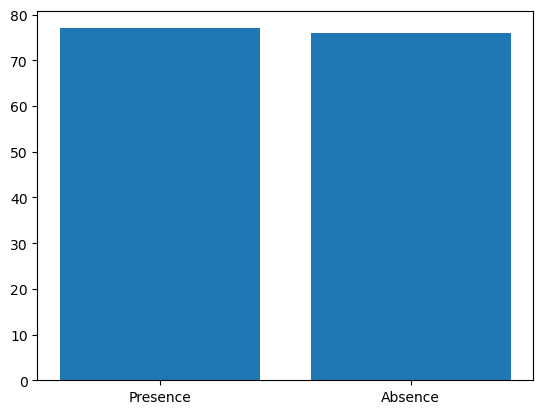

In [4]:
plt.bar(df_1["Heart Disease"], df_1["Age"])

## Cleaning the data

In [5]:
df_1.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df_1["Heart Disease"]

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_1["Heart Disease"] = le.fit_transform(df_1["Heart Disease"])
df_1["Heart Disease"]

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

## Preparing the data to train

In [8]:
X = df_1.drop("Heart Disease", axis=1)
y = df_1["Heart Disease"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Making the model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knNeigh = KNeighborsClassifier()

knNeigh.fit(X_train, y_train)

knNeigh.score(X_test, y_test)

0.6666666666666666

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8333333333333334

# Using Neural Networks

In [13]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
df_2 = pd.read_csv("data/proj15/Heart_Disease_Prediction.csv")
df_2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
le2 = LabelEncoder()
df_2["Heart Disease"] = le2.fit_transform(df_2["Heart Disease"])

In [16]:
X = df_2.drop("Heart Disease", axis=1)
y = df_2["Heart Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
annModel = tf.keras.models.Sequential()

In [53]:
annModel.add(tf.keras.layers.Dense(units=13, activation='relu'))
annModel.add(tf.keras.layers.Dense(units=13, activation='relu'))
annModel.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

annModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
annModel.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 31.2638 - accuracy: 0.4491
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 23.4654 - accuracy: 0.4491
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 15.7096 - accuracy: 0.4491
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 8.2768 - accuracy: 0.4537
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 2.7772 - accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 3.4206 - accuracy: 0.5509
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 3.2069 - accuracy: 0.5324
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 2.3370 - accuracy: 0.4954
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 2.3091 - accuracy: 0.4583
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 2.0105 - accuracy: 0.5000
Epoch 11/100
7/7 [========

7/7 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8194
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7917
Epoch 86/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8009
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8241
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7963
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7731
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7870
Epoch 91/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8056
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8148
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8287
Epoch 94/100
7/7 [===============